# Exercise 1 Business and Data Understanding

## Business Understanding
To reduce the number of unexpected failures and optimize maintenance intervals, large aircraft maintenance companies aim to change their maintenance models from scheduled maintenance to predictive maintenance. One important aspect of this is the assessment of the current health status of the aircraft components and the prediction of their remaining lifetime based on measured sensor data. In this exercise, we focus on the prediction of aircraft engines.

The provided data contains run-to-failure simulations for different engines generated by the C-MAPSS (Commercial Modular Aero-Propulsion System Simulation) tool which is used for the simulation of a large commercial aircraft engine. Detailed information on the generation of the data can be found in the paper "Damage Propagation Modeling for Aircraft Engine Run-To-Failure Simulation" by Saxena, Goebel, Simon and Eklund that we provide you in Moodle.

The goal is to estimate the remaining useful lifetime (RUL) of the aircraft engines. The total exercise will be divided into three sub-tasks following the CRISP-DM model. In this week, the focus will be on the understanding of the available dataset.

## Data Understanding
In Moodle, you can download the file “train_FD001.txt” that contains run-to-failure curves from several engines. The dataset contains in total 26 parameters that are shown in the table below.
For each data entry, the corresponding engine number and cycle number is given. All engines were simulated until failure, meaning that the cycle numbers reach from 1 to the end of life of the engines. Parameters 2 - 4 indicate the operating conditions that were input parameters for the simulation. The remaining parameters 5 - 25 are the simulated sensor data and therefore the output of the simulation.



| Parameter | Name       | Description                      | Units    |
|-----------|------------|----------------------------------|----------|
| 0     	   | Engine     | 	Engine number                   | 	-       |
| 1	        | Cycle	     | Cycle number                     | 	-       |
| 2	        | Altitude   | 	Altitude                        | 	1000 ft |
| 3	        | MachNumber | 	Mach Number                     | 	-       |
| 4	        | TRA        | 	Thrust Resolver Angle           | 	-       |
| 5	        | T2         | 	Total temperature at fan inlet  | 	°R      |
| 6	        | T24        | 	Total temperature at LPC outlet | 	°R      |
| 7	        | T30        | 	Total temperature at HPC outlet | 	°R      |
| 8	        | T50        | 	Total temperature at LPT outlet | 	°R      |
| 9	        | P2         | 	Pressure at fan inlet           | 	psia    |
| 10	       | P15        | 	Total pressure in bypass-duct   | 	psia    |
| 11	       | P30        | 	Total pressure at HPC outlet    | 	psia    |
| 12	       | Nf         | 	Physical fan speed              | 	rpm     |
| 13	       | Nc         | 	Physical core speed             | 	rpm     |
| 14	       | epr        | 	Engine pressure ratio           | 	-       |
| 15	       | Ps30       | 	Static pressure at HPC outlet   | 	psia    |
| 16	       | phi        | 	Ratio of fuel flow to Ps30      | 	pps/psi |
| 17	       | NRf        | 	Corrected fan speed             | 	rpm     |
| 18	       | NRc        | 	Corrected core speed            | 	rpm     |
| 19	       | BPR        | 	Bypass ratio                    | 	-       |
| 20	       | farB       | 	Burner fuel-air ratio           | 	-       |
| 21	       | htBleed    | 	Bleed enthalpy                  | 	-       |
| 22	       | Nf_dmd     | 	Demanded fan speed              | 	rpm     |
| 23	       | PCNfR_dmd  | 	Demanded corrected fan speed    | 	rpm     |
| 24	       | W31        | 	HPT coolant bleed               | 	lbm/s   |
| 25	       | W32        | 	LPT coolant bleed               | 	lpm/s   |



For the simulation, the operating conditions were held constant at the following values:
- altitude = 0
- Mach number = 0
- Thrust Resolver Angle = 100




Please follow the following tasks to explore the given data:


### 1. Load the data into your program, e.g. into a pandas dataframe. As the txt-file does not contain a header, rename the columns with the parameter names from the table above.

In [1]:
import pandas as pd

path = '~/ml_project/Data/train_FD001.txt'
df = pd.read_csv(path, sep=' ', header=None)

df = df.drop(columns=[26, 27])

names = {0:'Engine', 1:'Cycle', 2:'Altitude', 3:'MachNumber', 4:'TRA', 5:'T2', 6:'T24', 
         7:'T30', 8:'T50', 9:'P2', 10:'P15', 11:'P30', 12:'Nf', 13:'Nc', 14:'epr',
         15:'Ps30', 16:'phi', 17:'NRf', 18:'NRc', 19:'BPR', 20:'farB', 21:'htBleed',
         22:'Nf_dmd', 23:'PCNfR_dmd', 24:'W31', 25:'W32'}

df = df.rename(columns=names)

df.head()

,Engine,Cycle,Altitude,MachNumber,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044


### 2. Look at the basic statistical properties of the data, for example using pandas "describe" function. What do you notice?

In [2]:
df.describe()

,Engine,Cycle,Altitude,MachNumber,TRA,T2,T24,T30,T50,P2,...,phi,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,2.063100e+04,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,5.186700e+02,642.680934,1590.523119,1408.933782,1.462000e+01,...,521.413470,2388.096152,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705
std,29.227633,68.880990,0.002187,0.000293,0.0,6.537152e-11,0.500053,6.131150,9.000605,3.394700e-12,...,0.737553,0.071919,19.076176,0.037505,1.556432e-14,1.548763,0.0,0.0,0.180746,0.108251
min,1.000000,1.000000,-0.008700,-0.000600,100.0,5.186700e+02,641.210000,1571.040000,1382.250000,1.462000e+01,...,518.690000,2387.880000,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,5.186700e+02,642.325000,1586.260000,1402.360000,1.462000e+01,...,520.960000,2388.040000,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800
50%,52.000000,104.000000,0.000000,0.000000,100.0,5.186700e+02,642.640000,1590.100000,1408.040000,1.462000e+01,...,521.480000,2388.090000,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900
75%,77.000000,156.000000,0.001500,0.000300,100.0,5.186700e+02,643.000000,1594.380000,1414.555000,1.462000e+01,...,521.950000,2388.140000,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800
max,100.000000,362.000000,0.008700,0.000600,100.0,5.186700e+02,644.530000,1616.910000,1441.490000,1.462000e+01,...,523.380000,2388.560000,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400


### 3. Take a closer look at the operating conditions and plot their distributions. Is the assumption of constant operating conditions fulfilled?

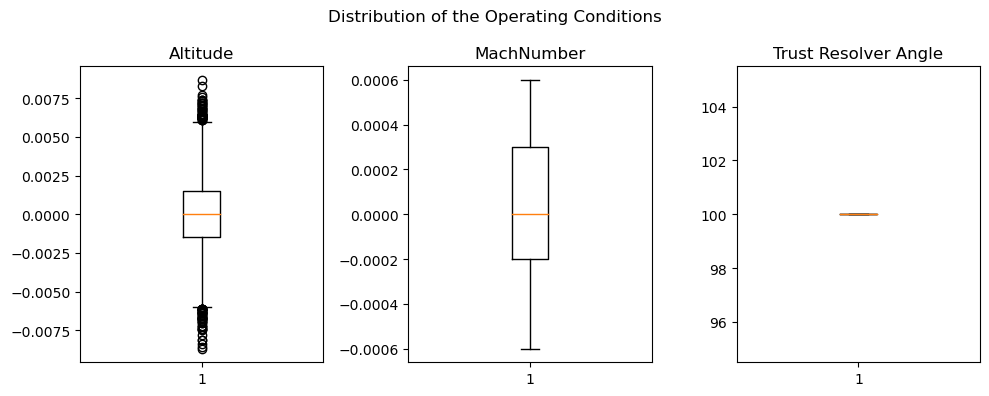

In [3]:
import matplotlib.pyplot as plt

Altitude = df['Altitude']
MachNumber = df['MachNumber']
Trust_Resolver_Angle = df['TRA']

fig, axs = plt.subplots(1, 3, figsize=(10, 4))

axs[0].boxplot(Altitude)
axs[0].set_title('Altitude')

axs[1].boxplot(MachNumber)
axs[1].set_title('MachNumber')

axs[2].boxplot(Trust_Resolver_Angle)
axs[2].set_title('Trust Resolver Angle')

fig.suptitle('Distribution of the Operating Conditions')

plt.tight_layout()

plt.show()

### 4. Now inspect the sensor data and plot their distributions. What can you conclude regarding their utility for predicting the remaining useful life?

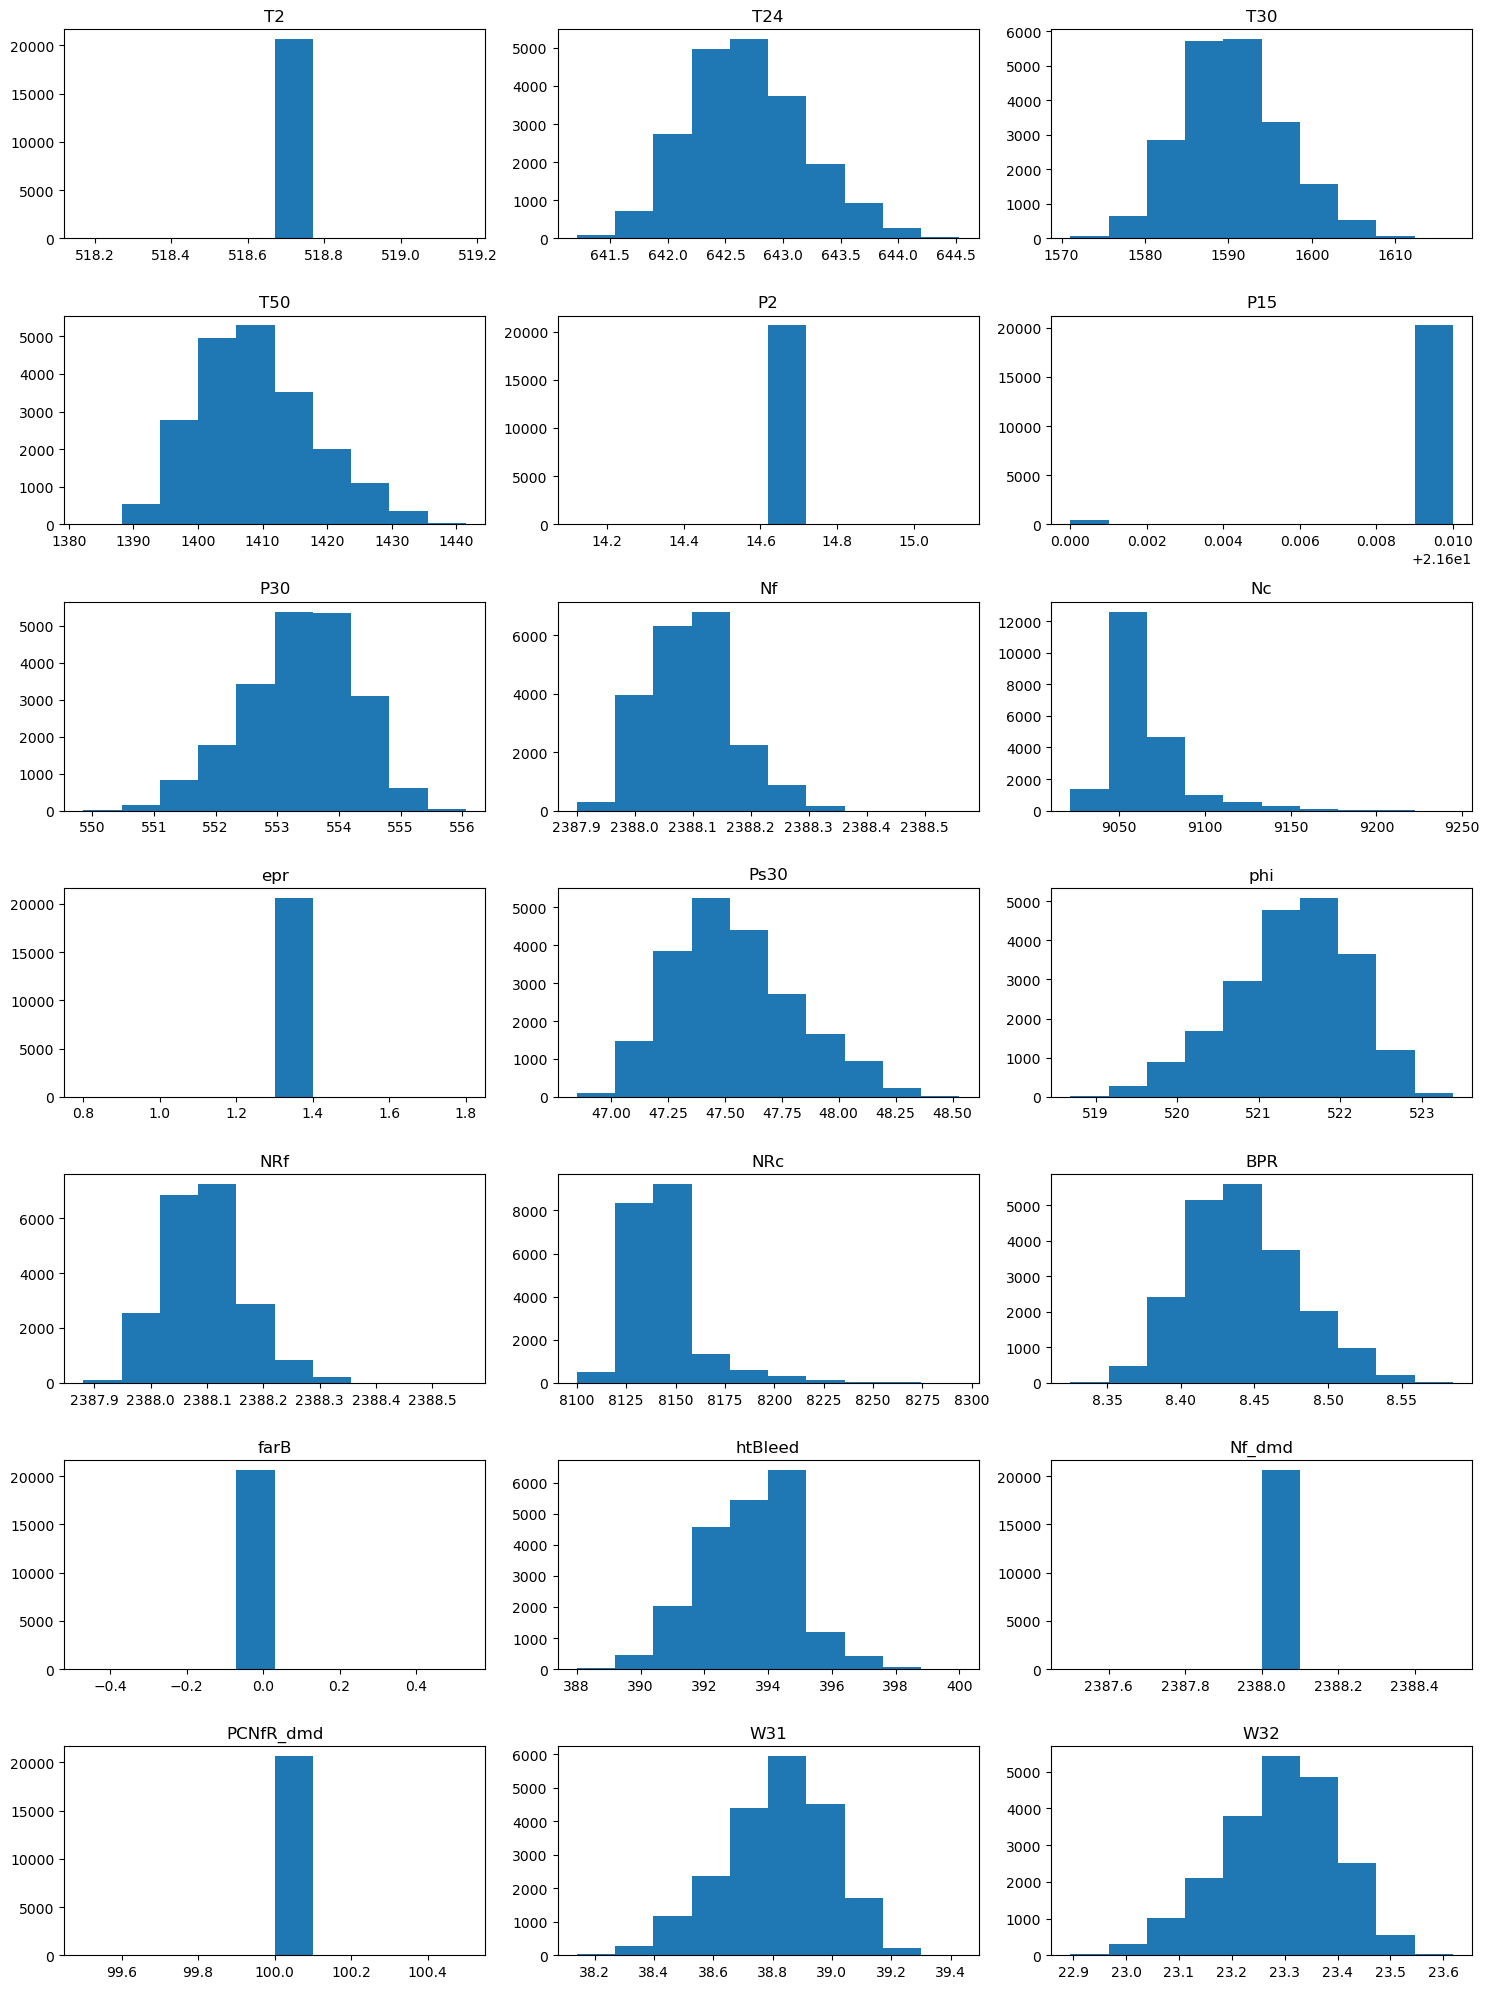

In [4]:
fig = plt.figure(figsize=[15,20])
sensor_number = 1

for parameter in df.columns[5:26]:
    ax = plt.subplot(7,3,sensor_number)
    plt.hist(df[parameter])
    ax.set_title(parameter)
    plt.tight_layout()
    sensor_number = sensor_number + 1
   


### 5. Perform a correlation analysis for the different sensors.

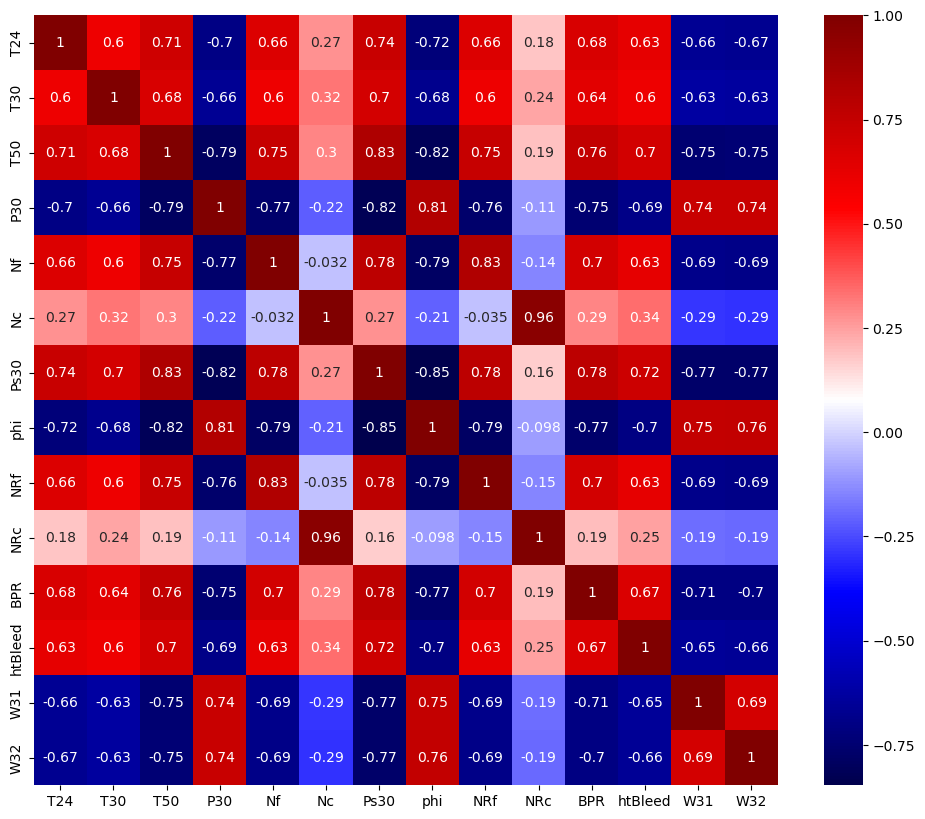

In [5]:
sensor_data = df.iloc[:,5:26]
sensor_data = sensor_data.drop(columns=['T2', 'P2', 'P15', 'epr', 'farB', 'Nf_dmd', 'PCNfR_dmd'])

correlation = sensor_data.corr()

import seaborn as sns

fig_1 = plt.figure(figsize=(12, 10))
sns.heatmap(correlation, cmap='seismic', annot=True)

plt.show()

### 6. For every engine, calculate the maximum number of cycles and display the distribution of the maximum number of cycles

In [95]:
df_max_cycles = df[['Engine', 'Cycle']].groupby(['Engine']).max()
df_max_cycles = df_max_cycles.rename(columns={'Cycle': 'Max_Cycles'})
df_max_cycles

,Max_Cycles
Engine,
1,192
2,287
3,179
4,189
5,269
...,...
96,336
97,202
98,156


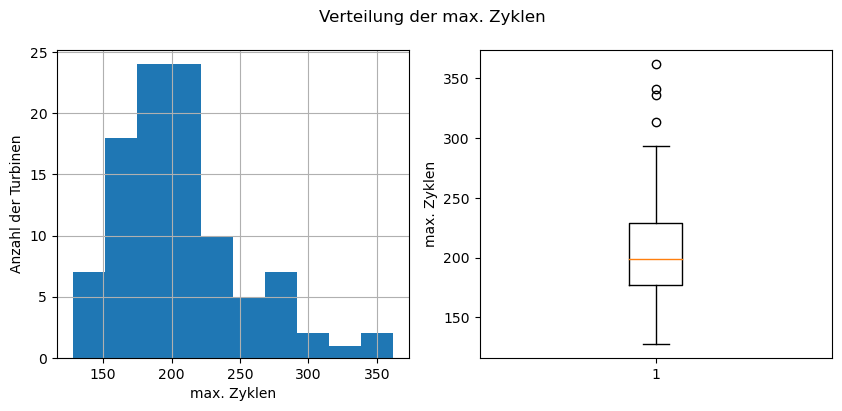

In [72]:
fig , axs = plt.subplots(figsize=(10,4), nrows=1, ncols=2)

axs[0].hist(df_max_cycles)
axs[0].grid(True)
axs[0].set_xlabel('max. Zyklen')
axs[0].set_ylabel('Anzahl der Turbinen')

axs[1].boxplot(df_max_cycles)
axs[1].set_ylabel('max. Zyklen')

fig.suptitle('Verteilung der max. Zyklen')

plt.show()

### 7. Calculate the target value for the prediction "RUL" and estimate the correlations between the sensors and the target. Hint: the remaining useful lifetime is defined as the number of cycles until the end of life.

In [96]:
df_rul = pd.merge(left=df, right=df_max_cycles, left_on='Engine', right_index=True)
df_rul

,Engine,Cycle,Altitude,MachNumber,TRA,T2,T24,T30,T50,P2,...,NRf,NRc,BPR,farB,htBleed,Nf_dmd,PCNfR_dmd,W31,W32,Max_Cycles
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200


### 8. Plot the time series of interesting sensors for different engines to investigate the found correlations.